In [1324]:
import pandas as pd

In [1325]:
class Project:
    def __init__(self,project_id,project_name):
        self.project_id = project_id
        self.project_name = project_name

In [1326]:
class Employee:
    def __init__(self,employee_id,employee_surname,hourly_rate):
        self.employee_id = employee_id
        self.employee_surname = employee_surname
        self.hourly_rate = hourly_rate

In [1327]:
class Account:
    def __init__(self,date,project_id,employee_id,hours_worked):
        self.date = date
        self.project_id = project_id
        self.employee_id = employee_id
        self.hours_worked = hours_worked

In [1328]:
df_projects = pd.read_csv('projects.csv')
df_projects

,project_id,project_name
0,1,Project_1
1,2,Project_2
2,3,Project_3


In [1329]:
df_employee = pd.read_csv('employee.csv')
df_employee

,employee_id,last_name,hourly_rate
0,101,Ivanchuk,10
1,102,Dudyntes,15
2,103,Urdeichuk,25


In [1330]:
df_accounts = pd.read_csv('accounts.csv')
df_accounts

,date,project_id,employee_id,hours_worked
0,2023-13-11,1,101,5
1,2023-13-11,1,102,8
2,2023-13-09,2,101,7
3,2023-13-09,2,103,6
4,2023-13-10,3,102,10
5,2023-13-10,3,103,4


In [1331]:
# 2(a)
df_merged = pd.merge(df_accounts,df_projects)
df_merged = pd.merge(df_merged,df_employee)

total_hours_per_project = df_merged.groupby('project_name')['hours_worked'].sum().reset_index()
total_hours_per_project


,project_name,hours_worked
0,Project_1,13
1,Project_2,13
2,Project_3,14


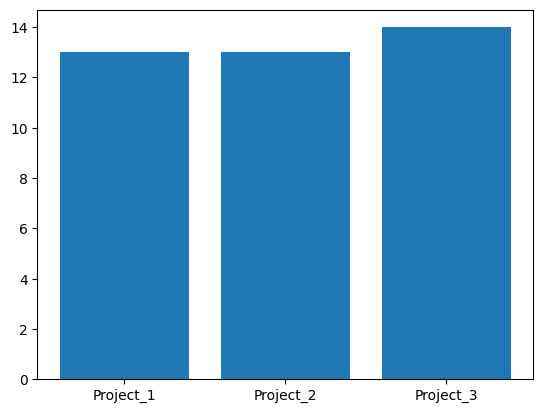

In [1332]:
#2(b)
import matplotlib.pyplot as plt

plt.bar(total_hours_per_project['project_name'], total_hours_per_project['hours_worked'])
plt.show()


In [1333]:
# 3(a)
input_employee_surname = 'Dudyntes'

choosen_employee = df_merged[df_merged['last_name'] == input_employee_surname]

choosen_employee_with_total = choosen_employee.groupby('project_id').sum().reset_index()
choosen_employee_with_total['total'] = choosen_employee_with_total['hours_worked'] * choosen_employee_with_total['hourly_rate']

choosen_employee_with_total


,project_id,date,employee_id,hours_worked,project_name,last_name,hourly_rate,total
0,1,2023-13-11,102,8,Project_1,Dudyntes,15,120
1,3,2023-13-10,102,10,Project_3,Dudyntes,15,150


In [1334]:
# 3(b)

max_hours_project = choosen_employee.groupby('project_name')['hours_worked'].sum().reset_index()
max_hours_project = max_hours_project[max_hours_project['hours_worked'] == max_hours_project['hours_worked'].max()]
max_hours_project

,project_name,hours_worked
1,Project_3,10
